In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [31]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')

In [32]:
sheets=["SHA", "QIA", "JA", "ashes", "spider"]
colors = ["black", "#c95428"]
save_path = '../plots/'

In [33]:
df = pd.read_excel("../manuscript_data.xlsx", sheet_name=sheets[1])
df.head(3)

,sample,depth,lithology,age,d13C,Hg,TOC,TOC_RE,Hg_TOC,Al,Fe,V,d202Hg,d202_se,D199Hg,D199_se,D200Hg,D200_se,D201Hg,D201_se
0,Q156c,0.1,rock,Middle Smithian,-2.14,6.42,NaN,NaN,NaN,2.560434,1.472413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q157,0.7,rock,Middle Smithian,-2.24,4.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q22,1.4,rock,Middle Smithian,-2.28,8.15,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
Hg_TOC=df["Hg_TOC"]
depth = df["depth"]
TOC = df["TOC"]
d202Hg=df["d202Hg"]
err202=df["d202_se"]
D199 = df["D199Hg"]
err199=df["D199_se"]
D200 = df["D200Hg"]
err200=df["D200_se"]
d13C = df["d13C"]
Hg=df["Hg"]

In [35]:
Al = df['Al']
Fe_Al = df['Fe']/Al
V_Al = df['V']/Al
Hg_Al = Hg/Al
Hg_Fe = Hg/df['Fe']
Hg_V = Hg/V_Al

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


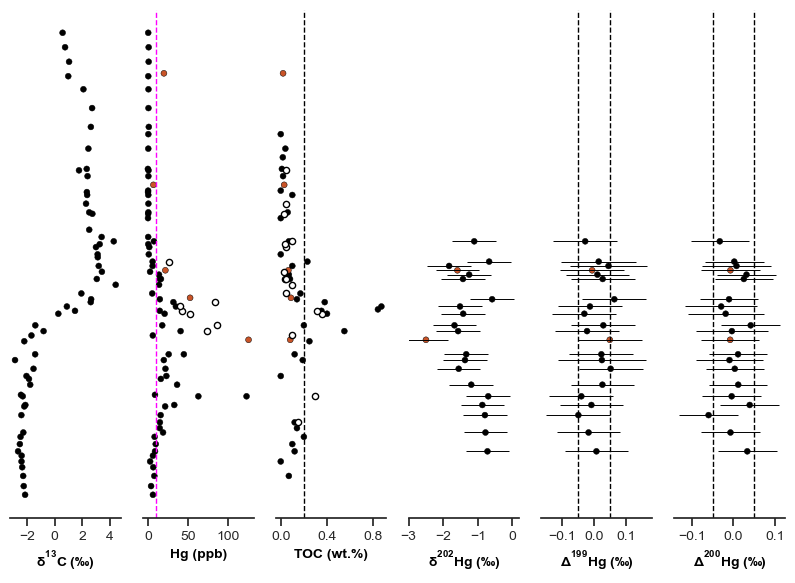

In [36]:
fig, axes = plt.subplots(figsize=(10, 6.6),  # constrained_layout=True,
                         ncols=6, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])
ax= [ax0, ax1, ax2, ax3, ax4, ax5]
# d13C
c= sns.scatterplot(data=df, x=d13C, y=depth, ax=ax0,
                   color="black", legend=False, edgecolor="black",
                   size=20)
c.set_xlabel(r"$\delta^{13}C\;(‰)$", fontsize=10, c="black", fontweight="bold")
c.set_xticks([-2, 0, 2, 4])

# Hg
Hg = sns.scatterplot(data=df, x=df["Hg"], y=df["depth"], ax=ax1,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax1.scatter(Hg_TOC, depth, s=20, color="white",edgecolor="black")
ax1.axvline(x=10, linestyle="--", color="fuchsia", linewidth=1)
Hg.set_xticks([0, 50, 100])
Hg.set_xlabel("Hg (ppb)", fontsize=10, c="black", fontweight="bold")

#TOC 
om = sns.scatterplot(data=df, x=TOC, y=df["depth"], ax=ax2,
                     hue="lithology", color="black", legend=False,
                     edgecolor="black", size=20, palette=colors)
om.set_xticks([0, .4, .8])
om.set_xlabel("TOC (wt.%)", fontsize=10, c="black", fontweight="bold")
om.axvline(x=0.2, linestyle="--", color="black",linewidth=1)

# add rock-eval TOC plot to axes 2
ax2.scatter(df['TOC_RE'], depth, s=20, color="white", edgecolor="black")

# mdf
mdf = sns.scatterplot(data=df, x=d202Hg, y=depth, ax=ax3,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax3.errorbar(xerr=err202, y=depth,x=d202Hg, ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
mdf.set_xticks([0, -1, -2, -3])
mdf.set_xlim(-3,0.2)
mdf.set_xlabel(r"$\delta^{202}Hg\;(‰)$", fontsize=10,
               c="black", fontweight="bold")

# mif
mif = sns.scatterplot(data=df, x=D199, y=depth, ax=ax4,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax4.errorbar(xerr=err199, y=depth,x=D199, ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
# mif.set_xticks([0, -1, -2, -3])
# mif.set_xlim(-3,0.2)
mif.set_xlabel(r"$\Delta^{199}Hg\;(‰)$", fontsize=10,
               c="black", fontweight="bold")
mif.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
mif.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)

# mif2
mif2 = sns.scatterplot(data=df, x=D200, y=depth, ax=ax5,
                    hue="lithology", color="black", legend=False,
                    edgecolor="black", size=20, palette=colors)
ax5.errorbar(xerr=err200, y=depth,x=D200, ecolor="black", color="black",
             linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')
# mif.set_xticks([0, -1, -2, -3])
# mif.set_xlim(-3,0.2)
mif2.set_xlabel(r"$\Delta^{200}Hg\;(‰)$",
                fontsize=10, c="black", fontweight="bold")
mif2.axvline(x=0.05, linestyle="--", color="black", linewidth=1)
mif2.axvline(x=-0.05, linestyle="--", color="black", linewidth=1)

for i in range(6):
    ax[i].tick_params(labelsize=10)
    
# plt.savefig("../plots/qiakong_all.pdf", dpi=600)


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


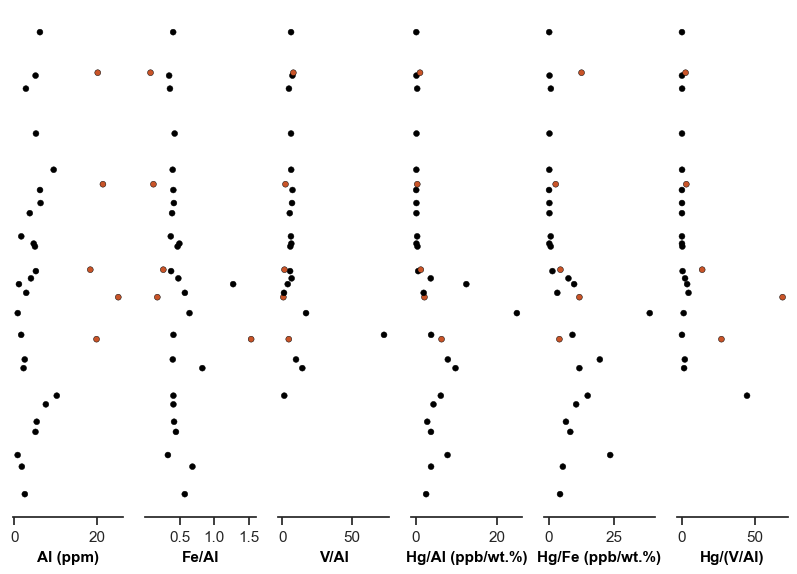

In [37]:
fig, axes = plt.subplots(figsize=(10, 6.6), nrows=1, ncols=6, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes
ax_list = [ax0, ax1, ax2, ax3, ax4, ax5]
plt_list = [Al, Fe_Al, V_Al, Hg_Al, Hg_Fe, Hg_V]
labels = ["Al (ppm)", "Fe/Al", "V/Al", "Hg/Al (ppb/wt.%)", "Hg/Fe (ppb/wt.%)", "Hg/(V/Al)"]
# xticks = [[1, 2, 3, 4, 5, 6, 7], [0, 10, 20]]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])


def make_plot(data, f_size, f_name):
    for i in range(len(ax_list)):
        sns.scatterplot(data=data, x=plt_list[i], y=depth, ax=ax_list[i],
                        color='black', legend=False, edgecolor='black',
                        size=20, hue='lithology', palette=colors,
                        )
        ax_list[i].tick_params(labelsize=f_size)
        # ax_list[i].set_xticks(xticks[i])
        ax_list[i].set_xlabel(labels[i], fontsize=f_size,
                              c="black", fontweight="bold")
    plt.savefig(f'{save_path}{f_name}.pdf')


make_plot(df, 11, 'qia_supplement')

Create plots with lowess smoothing.

In [38]:
import numpy as np
import pylab
import seaborn as sns
import statsmodels.api as sm

In [39]:
x=df["depth"]
y=df['Hg']
smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=.13)
# smoothed

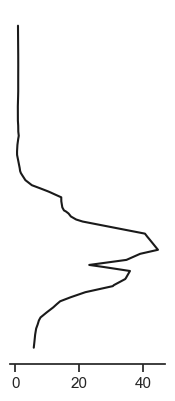

In [40]:
# fig, axes = plt.subplots(figsize=(2, 4.6),
#                          ncols=1, nrows=1, sharey=True)
# ax0 = axes
fig, ax = pylab.subplots(figsize=(2, 4.6),)
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])
# Hg
# c = sns.scatterplot(y=smoothed[:,0], x=smoothed[:, 1], ax=ax0,
#                     color="black", legend=False, edgecolor="black",
#                     size=20)
# c.set_xlabel("Hg (ppb)", fontsize=10, c="black", fontweight="bold")
ax.plot(smoothed[:, 1], smoothed[:, 0], c='k')
